# Final Presentation of Group 2 (Osman, 지천강)

We used arduino and accelerometer(ADXL345) to measured the vibration of the monitor in classroom to calculate the natural frequency of the monitor, and here are the results.

In [18]:
from __future__ import division
import sympy
sympy.init_printing()
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

### Using the data through arduino dashboard serial monitor, we can get the data of the vibration motion. We saved the data and named it as "measured data.txt".

### And then, using Python code to plot the measured data and applied the FFT algorism to it. 

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


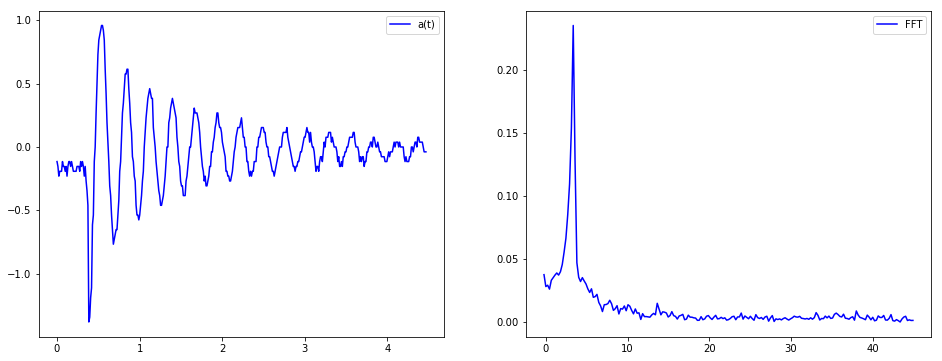

In [19]:
S = np.loadtxt("measured data.txt")  # import measured acceleration data

S = S/256*9.807     # change raw data into real m/s^2 scale (256 in raw data -> 9.807 m/s^2 in real world)

dt=0.011   #time step of the signal
Fs=1/dt #%sampling frequency(Hz)

N=len(S)  #sampling points

t=np.arange(len(S))*dt

Y = scipy.fft(S) # FFT
Ayy = (abs(Y)) 
Ayy=Ayy/(N/2)   
Ayy[0]=Ayy[0]/2.
F=(np.arange(0,N,1)-1)*Fs/N # frequency scale

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(t, S, color="blue", label="a(t)")  #display acceleration of vibration in time domain
axes[0].legend()
axes[1].plot(F[:N/2],Ayy[:N/2], color="blue", label="FFT") #display FFT result in frequency domain
axes[1].legend()

### Two plots are clear enough to find the natural frequency of the monitor. However, we can find that there are unnatural chattering in the plot, and that is because of the noise of the sensor. And we can reduce these noise using "Moving Average Filter". 

### To show the effect of the "Moving Average Filter" directly, we measured the static motion to get the noise data, and named it as "noise data.txt".

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


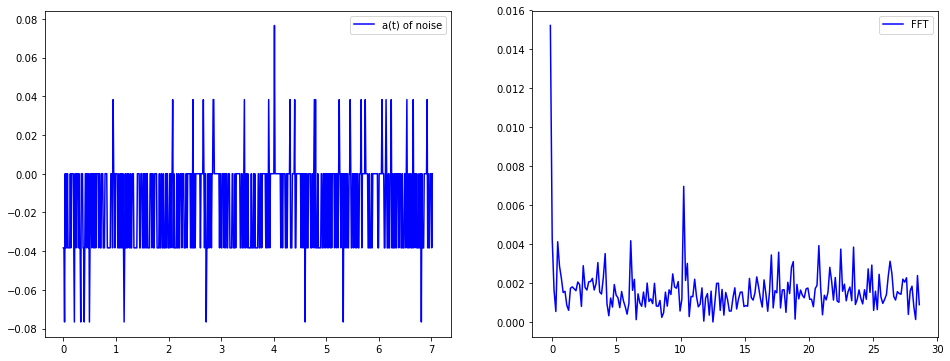

In [20]:
S_noise = np.loadtxt("noise data.txt")   # import noise data

S_noise = S_noise/256*9.807

dt=0.011   
Fs=1/dt 

N_noise=len(S_noise)  

t_noise=np.arange(len(S_noise))*dt

Y_noise = scipy.fft(S_noise) 
Ayy_noise = (abs(Y_noise)) 
Ayy_noise=Ayy_noise/(N_noise/2) 
Ayy_noise[0]=Ayy_noise[0]/2.
F_noise=(np.arange(0,N_noise,1)-1)*Fs/N_noise

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(t_noise, S_noise, color="blue", label="a(t) of noise")
axes[0].legend()
axes[1].plot(F_noise[:N/2],Ayy_noise[:N/2], color="blue", label="FFT")
axes[1].legend()

### Then, we applied the "Moving Average Filter".

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


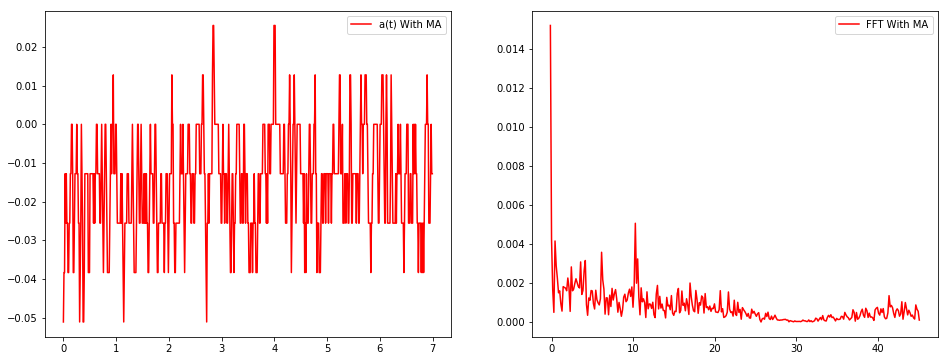

In [21]:
SS_noise=np.zeros(len(S_noise)-2)

for i in range(len(S_noise)-2): 
    SS_noise[i]=(S_noise[i]+S_noise[i+1]+S_noise[i+2])/3.     # apply Moving Average Filter

NN_noise=len(SS_noise)  

tt_noise=np.arange(len(SS_noise))*dt

Y_noise = scipy.fft(SS_noise) 
Ayyy_noise = (abs(Y_noise))



Ayyy_noise=Ayyy_noise/(NN_noise/2) 
Ayyy_noise[0]=Ayyy_noise[0]/2.
FF_noise=(np.arange(0,NN_noise,1)-1)*Fs/NN_noise


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(tt_noise, SS_noise, color="red", label="a(t) With MA")
axes[0].legend()
axes[1].plot(FF_noise[:NN_noise/2],Ayyy_noise[:NN_noise/2], color="red", label="FFT With MA")
axes[1].legend()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


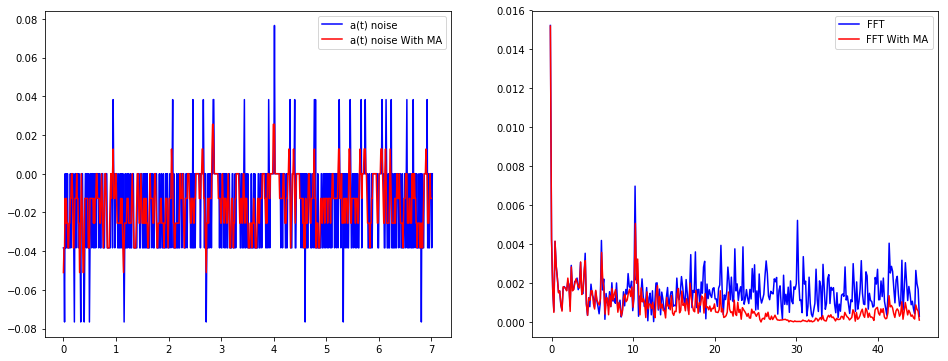

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(t_noise, S_noise, color="blue", label="a(t) noise")
axes[0].plot(tt_noise, SS_noise, color="red", label="a(t) noise With MA")
axes[0].legend()
axes[1].plot(F_noise[:N_noise/2],Ayy_noise[:N_noise/2], color="blue", label="FFT")
axes[1].plot(FF_noise[:NN_noise/2],Ayyy_noise[:NN_noise/2], color="red", label="FFT With MA")
axes[1].legend()

### We can find that there are significant reduction of the noise in high frequency area. 



### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Since the efficient of the "Moving Average Filter" has been proved, we can improve our data curve using "Moving Average Filter"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


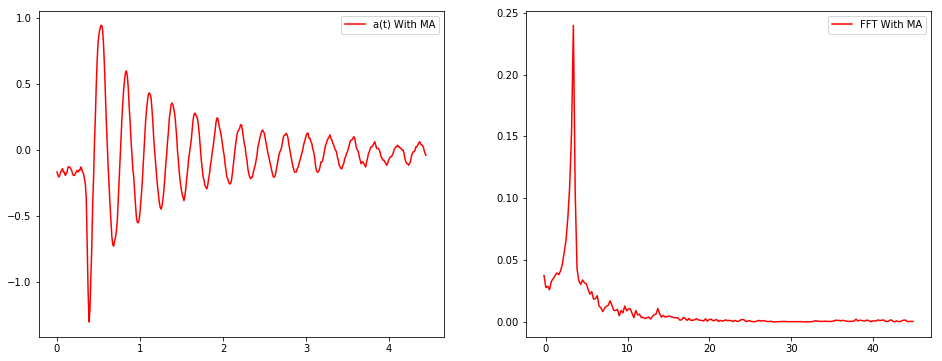

In [23]:
SS=np.zeros(len(S)-2)
for i in range(len(S)-2):
    SS[i]=(S[i]+S[i+1]+S[i+2])/3.

NN=len(SS) 

tt=np.arange(len(SS))*dt

Y = scipy.fft(SS)
Ayyy = (abs(Y))


Ayyy=Ayyy/(NN/2)
Ayyy[0]=Ayyy[0]/2.
FF=(np.arange(0,NN,1)-1)*Fs/NN 


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(tt, SS, color="red", label="a(t) With MA")
axes[0].legend()
axes[1].plot(FF[:NN/2],Ayyy[:NN/2], color="red", label="FFT With MA")
axes[1].legend()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


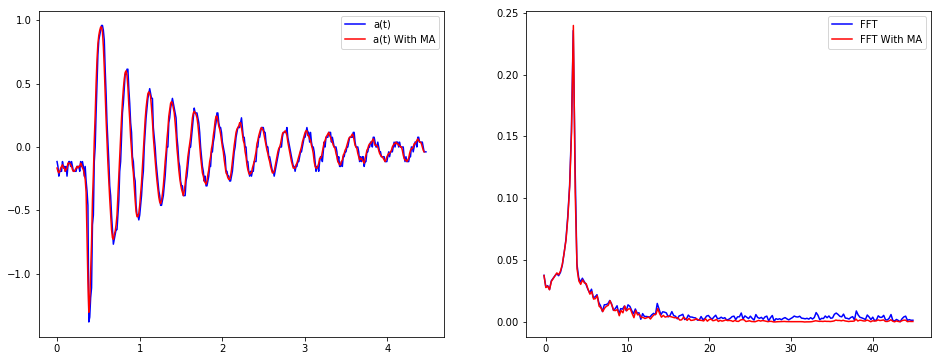

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(t, S, color="blue", label="a(t)")
axes[0].plot(tt, SS, color="red", label="a(t) With MA")
axes[0].legend()
axes[1].plot(F[:N/2],Ayy[:N/2], color="blue", label="FFT")
axes[1].plot(FF[:NN/2],Ayyy[:NN/2], color="red", label="FFT With MA")
axes[1].legend()

3.367003367


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


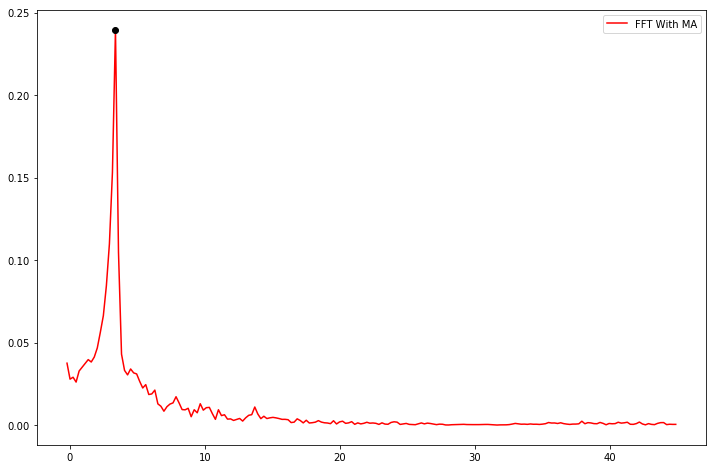

In [25]:
position = np.argmax(Ayyy)       # find the position of the maximum value point
natural_frequency=FF[position]   # find the natural frequency

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(FF[:NN/2],Ayyy[:NN/2], color="red", label="FFT With MA")
ax.plot([natural_frequency], [Ayyy[position]], marker='o', color="black" )   # mark the maximum point to see wether the maximum point is right
ax.legend()

print natural_frequency      # print the natural frequency

### From the figure, we can find that the natural frequency of the monitor is 3.35 Hz.